## Zadanie 3
Zbadać wpływ dopełnienia zerami na postać widma amplitudowego i widma fazowego dyskretnego sygnału 𝑠[𝑛] = 𝐴 (1 − (𝑛 𝑚𝑜𝑑 𝑁)/
𝑁 ) o amplitudzie 𝐴 = 3 i okresie podstawowym 𝑁 = 11. W tym celu dla
każdej wartości 𝑁0 ∈ {0,1𝑁, 4𝑁, 9𝑁} wykreślić widmo amplitudowe i fazowe sygnału 𝑠[𝑛]
dopełnionego 𝑁0 zerami. Skomentować otrzymane wyniki.

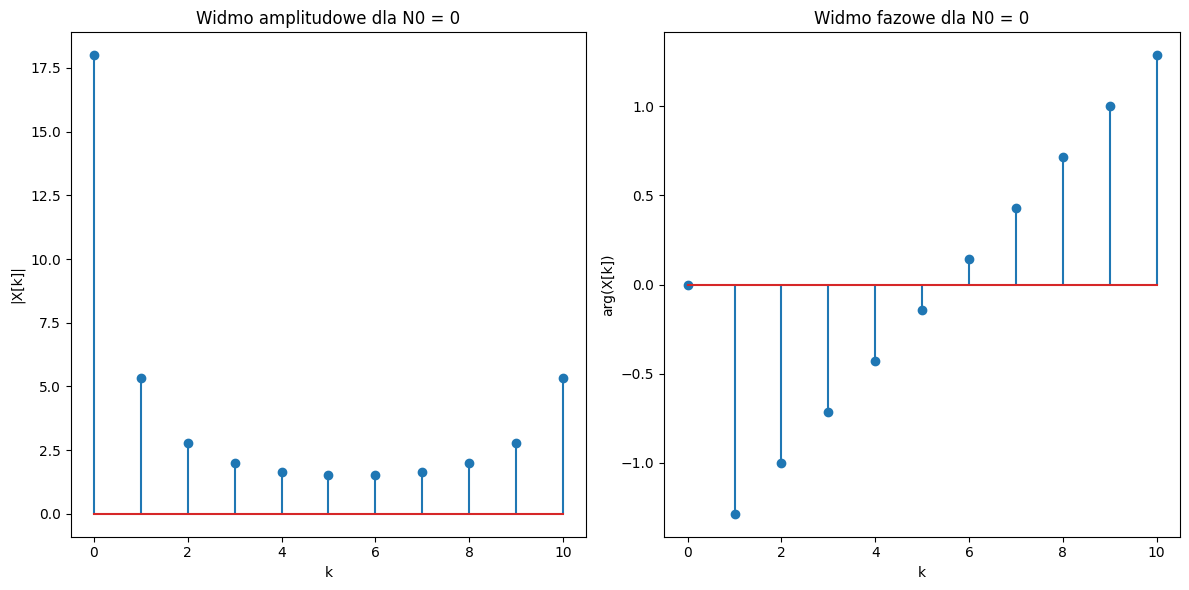

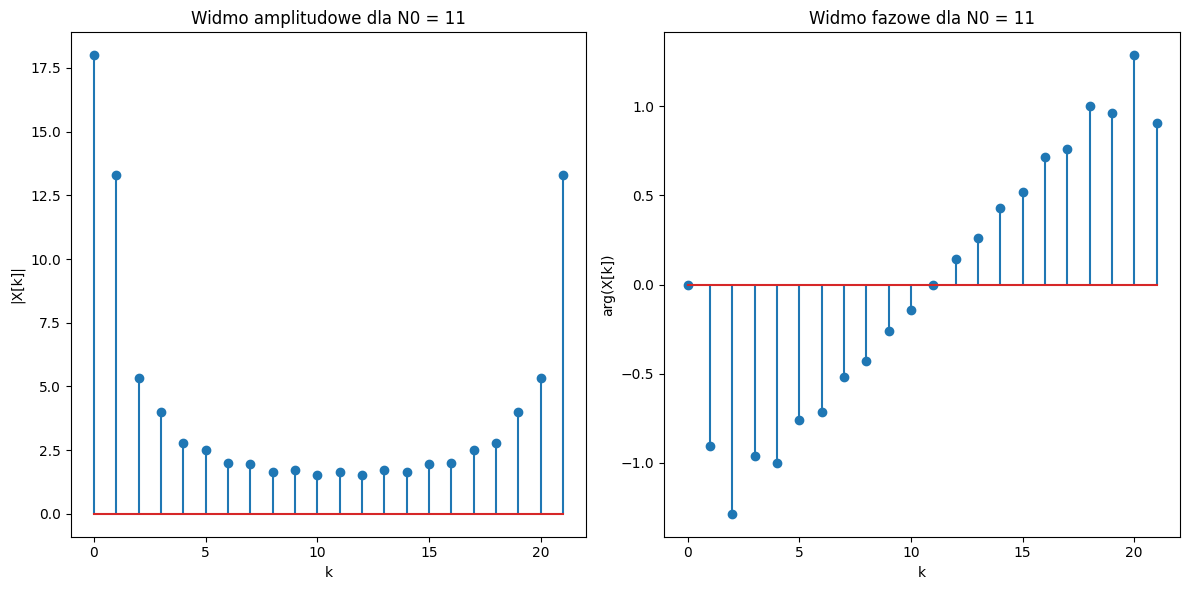

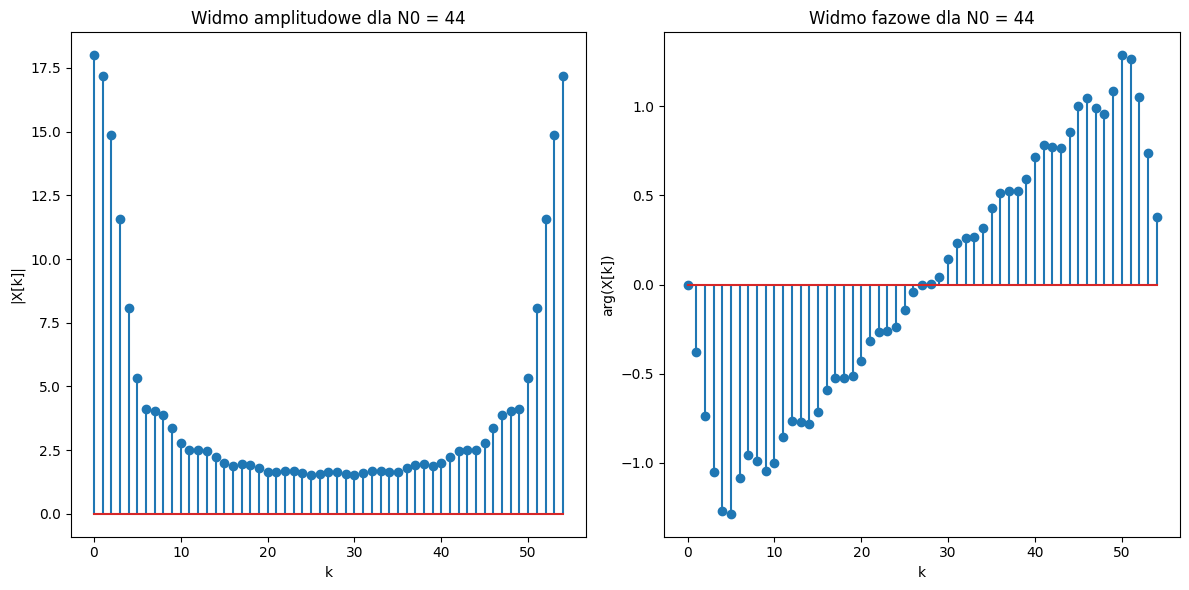

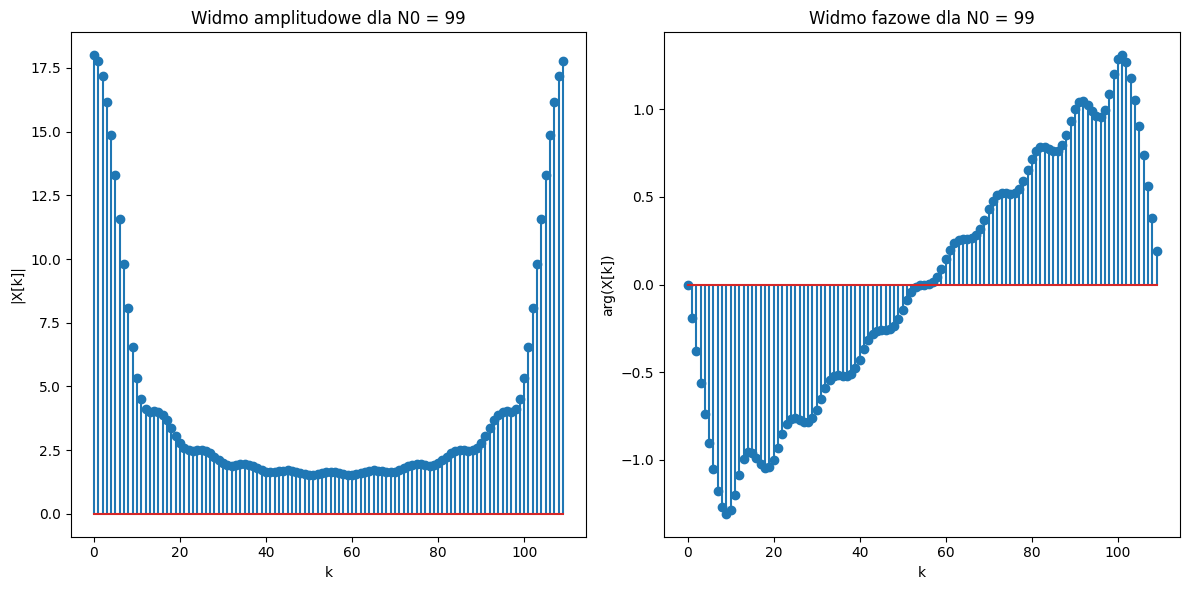

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#funkcja calculate odopenia sygna zerami
def calculate(n, zero_count, A, N):
    signal = A * (1 - ((n % N) / N))
    signal_zeros = np.concatenate((signal, np.zeros(zero_count)))
    return signal_zeros

def main():
    #ustalenie wartosi zmiennych zgodnie z parametrami zadania
    A = 3
    N = 11
    N0 = [0, N, 4*N, 9*N]
    n = np.arange(0, N)
    for zero_count in N0:
        x = calculate(n, zero_count, A, N)
        X = np.fft.fft(x)
        #filtorwanie malych liczb
        for xi in X:
            if (xi.imag < 1e-10 or xi.real < 1e-10):
                xi = 0

        plt.figure(figsize=(12, 6))

        #wykres widma amplitudowego
        plt.subplot(1, 2, 1)
        plt.stem(np.arange(0, N+zero_count), np.abs(X))
        plt.title(f"Widmo amplitudowe dla N0 = {zero_count}")
        plt.xlabel("k")
        plt.ylabel("|X[k]|")

        #wykres widma fazowego
        plt.subplot(1, 2, 2)
        plt.stem(np.arange(0, N+zero_count), np.angle(X))
        plt.title(f"Widmo fazowe dla N0 = {zero_count}")
        plt.xlabel("k")
        plt.ylabel("arg(X[k])")

        plt.tight_layout()
        plt.show()

main()

##### Wnioski
Jak możemy zauważyć na powyższych wykresach dopełnianie zerami nie zmienia kształtu wykresu widm. Natomiast w miarę wzrostu ilości zer rozdzielczość wykresów wzrasta gdyż pojawia się więcej punktów. Tak więc w ogólności można stwierdzić że dopełnienie zerami zwiększa dokładność otrzymanych widm.

## Zadanie 4
Dany jest sygnał rzeczywisty 𝑠(𝑡) = $ 𝐴1 𝑠𝑖𝑛(2𝜋𝑓1𝑡) + 𝐴2 𝑠𝑖𝑛(2𝜋𝑓2𝑡) + 𝐴3 𝑠𝑖𝑛(2𝜋𝑓3𝑡) $, gdzie 𝐴1 = 0.1 , 𝑓1 = 3000 Hz, 𝐴2 = 0.4 , 𝑓2 = 4000 Hz, 𝐴3 = 0.8 , 𝑓3 = 10000 Hz. 
Przy założeniu, że częstotliwość próbkowania wynosi 𝑓𝑠 = 48000 Hz, a liczba próbek sygnału wynosi 𝑁1 = 2048 ,przedstawić wykres widmowej gęstości mocy sygnału spróbkowanego. Czy dla podanej liczby próbek mamy do czynienia ze zjawiskiem przecieku widma? Czy sytuacja uległaby zmianie dla liczby próbek 𝑁2 = 3/2𝑁1? 
Odpowiedź uzasadnić.

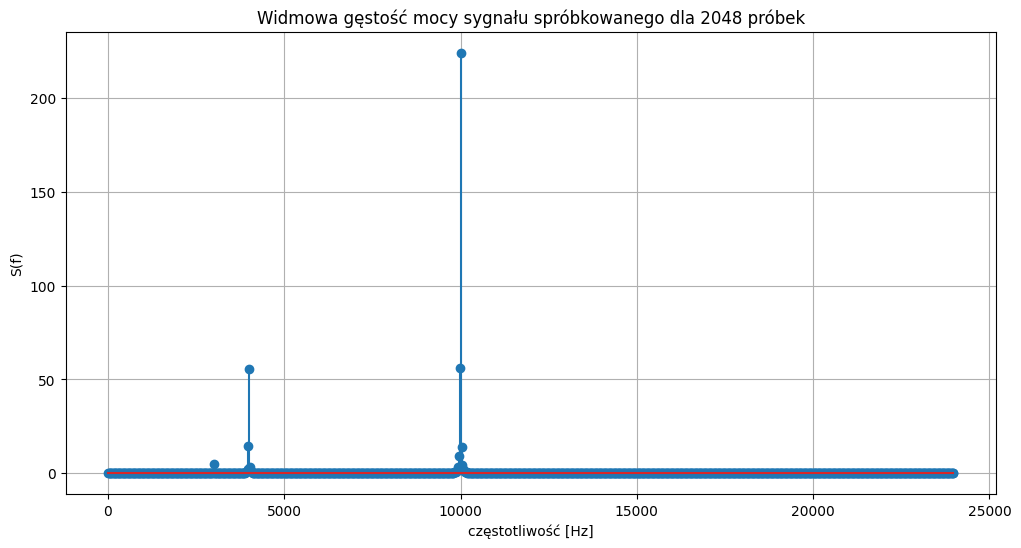

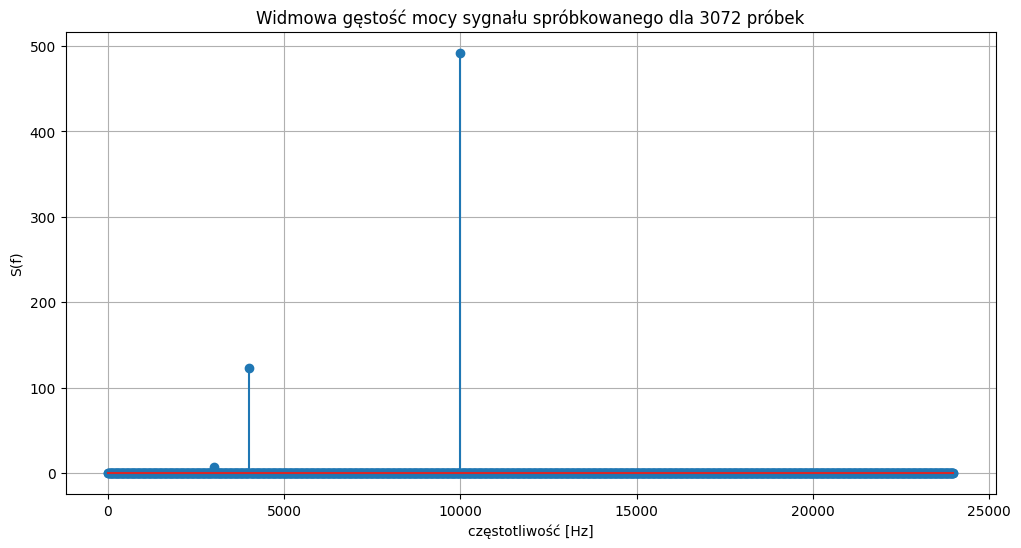

In [ ]:
#deklaracja stałych zgodnie z treścią zadania
a1 = 0.1
a2 = 0.4
a3 = 0.8
f1 = 3000
f2 = 4000
f3 = 10000
fs = 48000
N1 = 2048
#funkcja signal generuje sygnał spróbkowany
def signal(N):
    time = np.arange(0, N)/fs
    signal = a1 * np.sin(2*np.pi*time*f1) + a2 * np.sin(2*np.pi*time*f2) + a3 * np.sin(2*np.pi*time*f3)
    return(signal)

#funkcja plot rysuje wykres widmowej gęstość mocy sygnału spróbkowanego dla zadanego n
def plot(N):
    s = signal(N)
    X = np.fft.fft(s)
    #filtorwanie malych liczb
    for xi in X:
        if (xi.imag < 1e-10 or xi.real < 1e-10):
            xi = 0
    density = abs(X ** 2 / N) # widmowa gęstość mocy
    freq = np.fft.fftfreq(N, 1 / fs)
    plt.figure(figsize=(12, 6))
    plt.stem(freq[:N//2], density[:N//2])
    plt.title(f"Widmowa gęstość mocy sygnału spróbkowanego dla {N} próbek")
    plt.xlabel("częstotliwość [Hz]")
    plt.ylabel("S(f)")
    plt.grid(True)

plot(N1)
plot(int(N1*3/2))

#### Wnioski
Jak możemy zauważyć na powyższych wykresach w przypadku gdy liczba próbek wynosi 2048 mamy do czynienia ze zjawiskiem przecieku widma. Na wykresie dla tej liczby próbek wyraźnie widać 3 wzrosty wartości odpowiadające częstotliwością $ f1, f2, f3 $, natomiast na wykresie widoczne są mniejsze wzrosty które są wynikiem " rozlania się " widma. Właśnie te wzrosty świadczą o występowaniu zjawiska przecieku.
W przypadku zwiększenia liczby próbek do 3072 wyraźnie widać, że poboczne piki zniknęły i na wykresie obserwujemy 3 piki. Tak więc przy zwiększeniu liczby próbek zjawisko przecieku znika. Dla mniejszej liczby próbek występuje zjawisko przecieku gdyż częstotliwości składowych sygnału nie są całkowitą wielokrotnością rozdzielczości częstotliwościowej DFT ($\Delta f = fs/N$). Zwiększenie liczby próbek poprawia rozdzielczość częstotliwościową a co za tym idzie eliminuje efekt przecieku widma.
